In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
df.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,2554.500000,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,1475.274268,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.000000,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1277.250000,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,2554.500000,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,3831.750000,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,5109.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
df['bmi']=df['bmi'].fillna(np.mean(df['bmi']))

In [4]:
pd.DataFrame({"number of null values":df.isna().sum()})
df.drop("id", axis=1, inplace=True)

In [5]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [6]:
num_cols = df.select_dtypes(exclude='object').columns.to_list()[1:]
num_cols


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

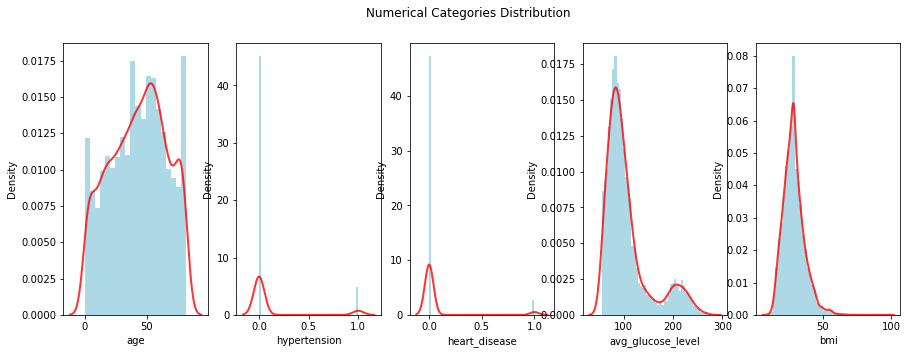

In [7]:
k=1
fig = plt.figure(figsize=(15,5))
fig.suptitle("Numerical Categories Distribution")

for col,k in zip(num_cols,np.arange(1,len(num_cols))):
    ax = fig.add_subplot(1,5,k)
    sns.distplot(df[col], ax=ax,kde=True, kde_kws={ "color":'r', "alpha": 0.8, "linewidth":2 }, hist_kws={ "linewidth": 3,
                            "alpha": 1, "color": "lightblue"} )
    fig.show()


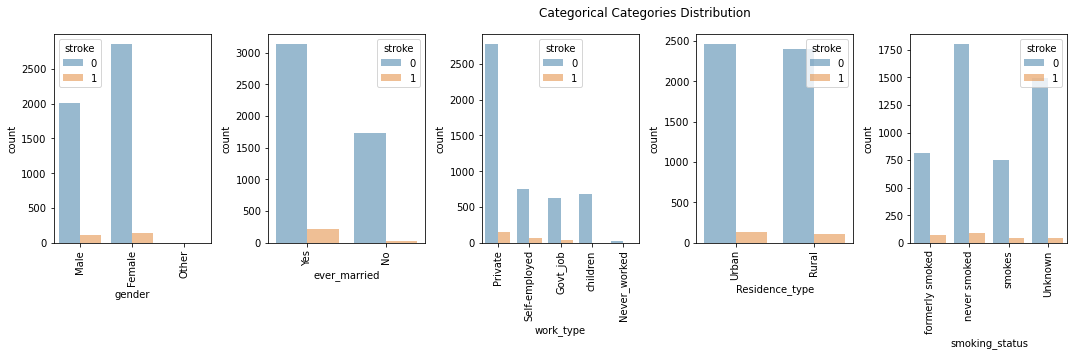

In [8]:
k=1
fig = plt.figure(figsize=(18,5))
fig.suptitle("Categorical Categories Distribution")

for col,k in zip(cat_cols,np.arange(1,len(cat_cols)+1)):
    ax = fig.add_subplot(1,6,k)
    sns.countplot(df[col], ax=ax, linewidth= 3, alpha= 0.5, hue=df['stroke'])
    plt.xticks(rotation=90)
    fig.tight_layout()
    fig.show()

<AxesSubplot:xlabel='work_type', ylabel='count'>

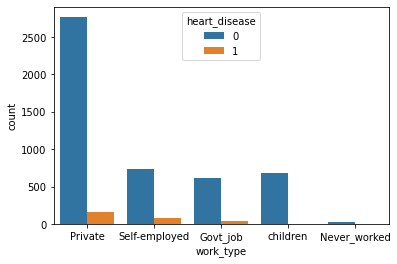

In [9]:
ax=sns.countplot(x=df['work_type'], hue=df['heart_disease'])
ax

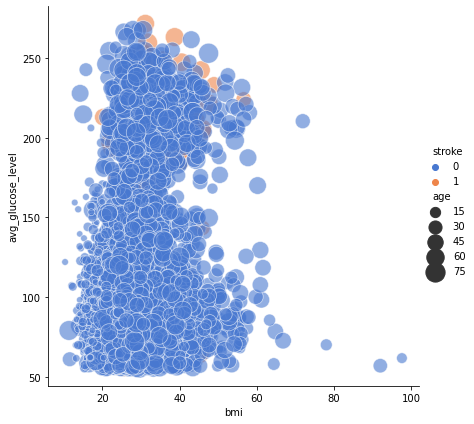

In [10]:
sns.relplot(x="bmi", y="avg_glucose_level", hue="stroke", size="age",
            sizes=(40, 400), alpha=0.6, palette="muted",
            height=6, data=df)

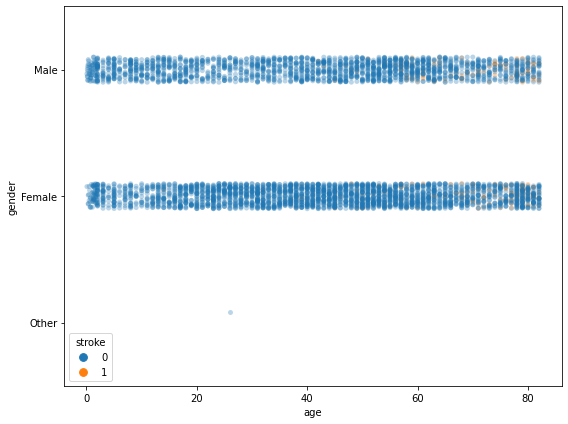

In [11]:
plt.figure(figsize=(8,6))

ax = sns.stripplot(y='gender', x='age', hue='stroke',alpha=0.3, data=df)
plt.tight_layout()

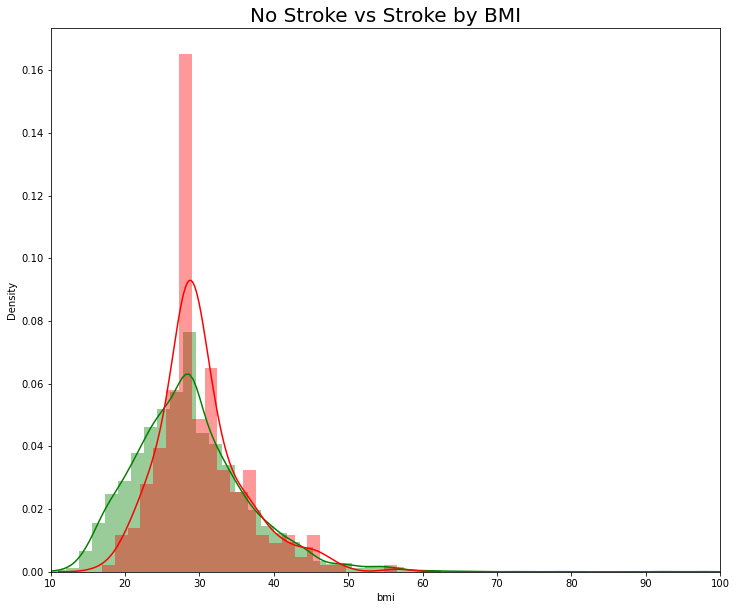

In [12]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=20)
plt.xlim([10,100])
plt.savefig('distribution_2.png', bbox_inches='tight')
plt.show()


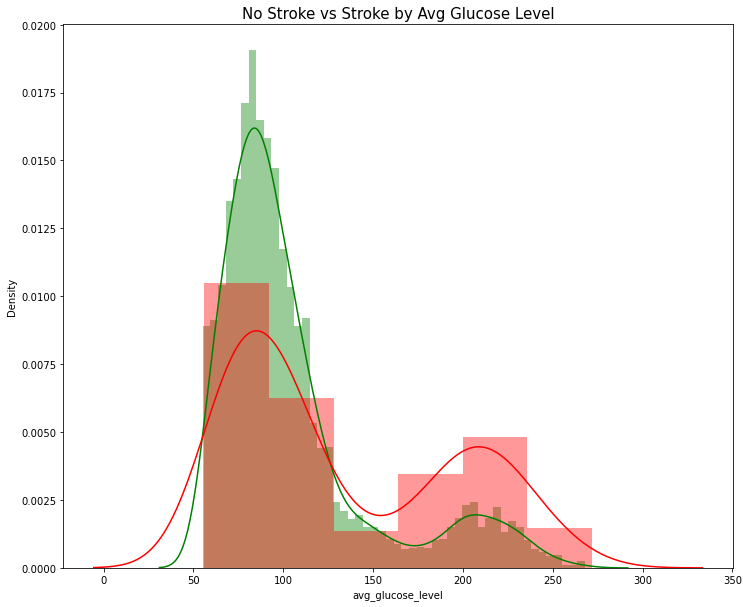

In [13]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg Glucose Level', fontsize=15)
plt.savefig('distribution_3.png', bbox_inches='tight')
plt.show()

In [14]:
y=df['stroke']

for feature in num_cols[:-1]:
    correlation=np.corrcoef(df[feature], y)[1][0]
    print(f"{feature} is correlated to stroke by a factor of {np.round(correlation,2)}")
    


age is correlated to stroke by a factor of 0.25
hypertension is correlated to stroke by a factor of 0.13
heart_disease is correlated to stroke by a factor of 0.13
avg_glucose_level is correlated to stroke by a factor of 0.13
bmi is correlated to stroke by a factor of 0.04


### Data processing 

In [15]:
df.head(10)

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
df= pd.get_dummies(df)

x=df.drop('stroke', axis=1)
y=df['stroke']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0,stratify=y)

### Standardization 

In [19]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())




### Model comparisons

In [21]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [22]:
models=[]
model_score=[]
models.append(['Logistic Regression', LogisticRegressionCV(cv=8,class_weight={0:0.95,1:0.05}, random_state=0 )])
models.append(['KNeighborsClassifier', KNeighborsClassifier(n_neighbors=3, weights='distance')])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['DecisionTreeClassifier', DecisionTreeClassifier(criterion='entropy', max_depth= 4)])
models.append(['RandomForestClassifier', RandomForestClassifier(n_estimators=50)])
models.append(['XGBClassifier', XGBClassifier(eval_metric= 'error')])
models.append(['SVC',SVC(kernel='linear', degree=4)])
models.append(['Extra Tree Classifier',ExtraTreeClassifier(random_state=0)])
models.append(['Ada Boost Classifier',AdaBoostClassifier(random_state=0)])

----------------------------------------------------------------------------------------------
Logistic Regression :
---------------------------------------------
Accuracy Score : 0.9960861056751468

K Fold Accuracy : 99.54

F1 Score : 0.9583333333333334

Recall : 0.92

ROC :0.96

Confusion Matrix : 

[[972   0]
 [  4  46]]



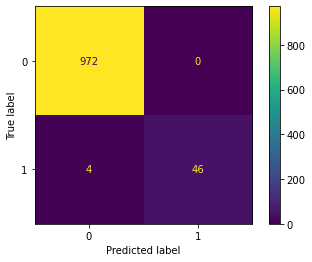

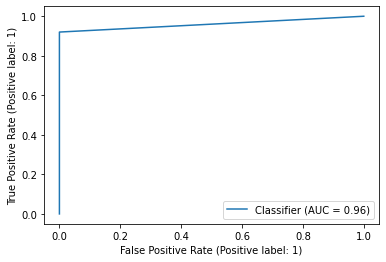

----------------------------------------------------------------------------------------------
KNeighborsClassifier :
---------------------------------------------
Accuracy Score : 0.9510763209393346

K Fold Accuracy : 94.86

F1 Score : 0.24242424242424243

Recall : 0.16

ROC :0.5758847736625514

Confusion Matrix : 

[[964   8]
 [ 42   8]]



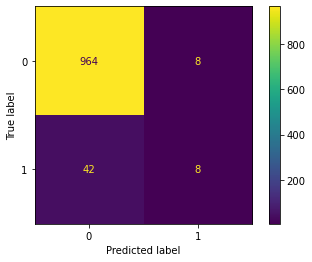

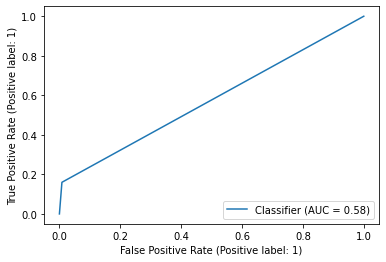

----------------------------------------------------------------------------------------------
GaussianNB :
---------------------------------------------
Accuracy Score : 0.9647749510763209

K Fold Accuracy : 96.53

F1 Score : 0.7313432835820894

Recall : 0.98

ROC :0.9719958847736626

Confusion Matrix : 

[[937  35]
 [  1  49]]



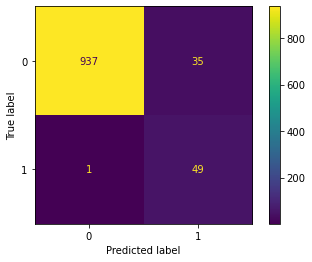

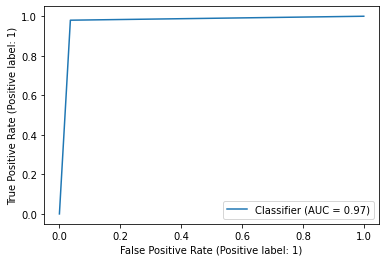

----------------------------------------------------------------------------------------------
BernoulliNB :
---------------------------------------------
Accuracy Score : 0.9158512720156555

K Fold Accuracy : 91.41

F1 Score : 0.23214285714285712

Recall : 0.26

ROC :0.6047942386831275

Confusion Matrix : 

[[923  49]
 [ 37  13]]



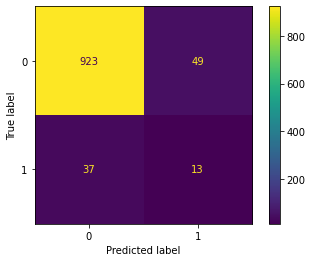

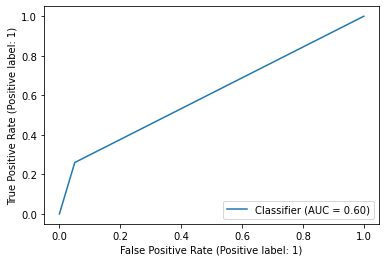

----------------------------------------------------------------------------------------------
DecisionTreeClassifier :
---------------------------------------------
Accuracy Score : 1.0

K Fold Accuracy : 100.00

F1 Score : 1.0

Recall : 1.0

ROC :1.0

Confusion Matrix : 

[[972   0]
 [  0  50]]



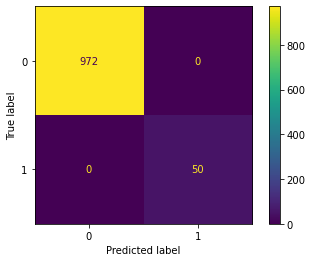

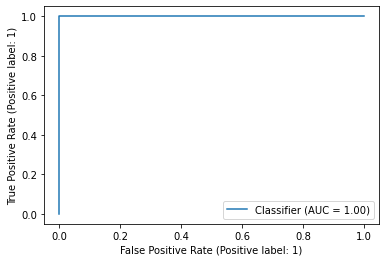

----------------------------------------------------------------------------------------------
RandomForestClassifier :
---------------------------------------------
Accuracy Score : 0.9990215264187867

K Fold Accuracy : 99.98

F1 Score : 0.98989898989899

Recall : 0.98

ROC :0.99

Confusion Matrix : 

[[972   0]
 [  1  49]]



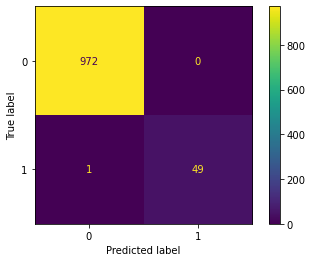

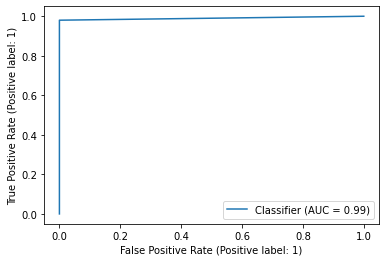

----------------------------------------------------------------------------------------------
XGBClassifier :
---------------------------------------------
Accuracy Score : 1.0

K Fold Accuracy : 100.00

F1 Score : 1.0

Recall : 1.0

ROC :1.0

Confusion Matrix : 

[[972   0]
 [  0  50]]



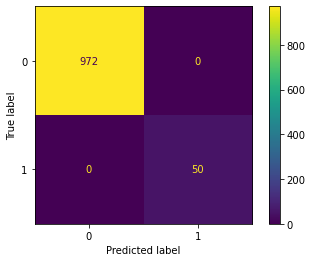

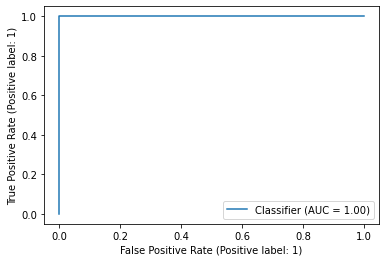

----------------------------------------------------------------------------------------------
SVC :
---------------------------------------------
Accuracy Score : 0.9951076320939335

K Fold Accuracy : 99.12

F1 Score : 0.9504950495049505

Recall : 0.96

ROC :0.9784567901234568

Confusion Matrix : 

[[969   3]
 [  2  48]]



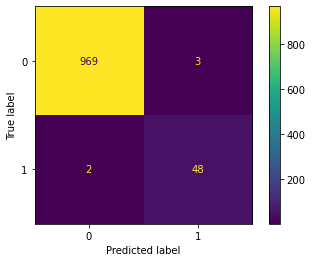

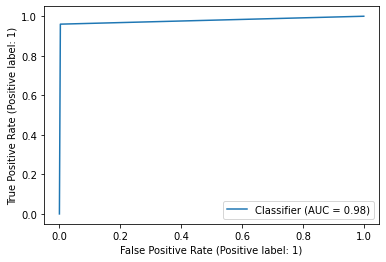

----------------------------------------------------------------------------------------------
Extra Tree Classifier :
---------------------------------------------
Accuracy Score : 0.9628180039138943

K Fold Accuracy : 94.81

F1 Score : 0.6415094339622641

Recall : 0.68

ROC :0.8286831275720166

Confusion Matrix : 

[[950  22]
 [ 16  34]]



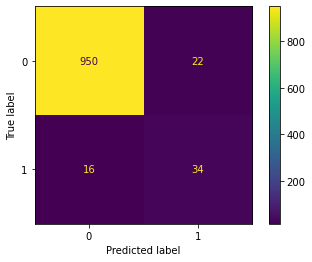

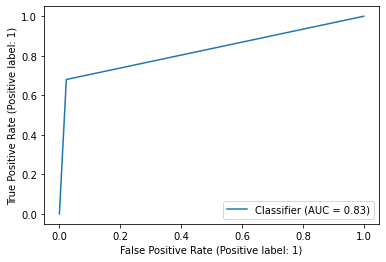

----------------------------------------------------------------------------------------------
Ada Boost Classifier :
---------------------------------------------
Accuracy Score : 1.0

K Fold Accuracy : 100.00

F1 Score : 1.0

Recall : 1.0

ROC :1.0

Confusion Matrix : 

[[972   0]
 [  0  50]]



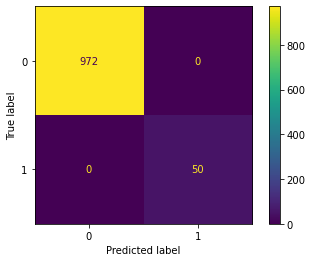

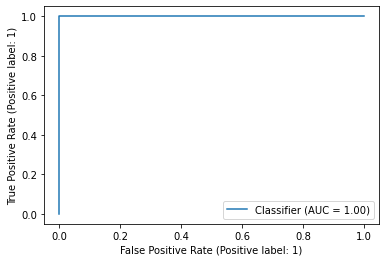

In [23]:
for model in models:
        model_data=[]
        model[1].fit(x_train, y_train)
        y_pred = model[1].predict(x_test)
        acc_score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test,y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test,y_pred)
        f1= f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        accuracies = cross_val_score(estimator = model[1], X = x_train, y = y_train, cv = 5)   #K-Fold Validation
        print('----------------------------------------------------------------------------------------------')
        print(f'{model[0]} :')
        print('---------------------------------------------')
        print(f'Accuracy Score : {acc_score}')
        print('')
        print(f'K Fold Accuracy : {accuracies.mean()*100:.2f}')
        print('')
        print(f'F1 Score : {f1}')
        print('')
        print(f'Recall : {recall}')
        print('')
        print(f'ROC :{roc}')
        print('')
        print(f'Confusion Matrix : ')
        print('')
        print(f'{conf_matrix}')
        print('')
        model_data.append(model[0])
        model_data.append(acc_score)
        model_score.append(model_data)
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        RocCurveDisplay.from_predictions(y_test, y_pred)
        plt.show()

In [24]:
model_accuracies = pd.DataFrame(model_score,columns=['Model', 'Accuracy'])
model_accuracies.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,DecisionTreeClassifier,1.000000
6,XGBClassifier,1.000000
9,Ada Boost Classifier,1.000000
5,RandomForestClassifier,0.999022
0,Logistic Regression,0.996086
7,SVC,0.995108
2,GaussianNB,0.964775
8,Extra Tree Classifier,0.962818
1,KNeighborsClassifier,0.951076
3,BernoulliNB,0.915851


In [25]:
from sklearn.model_selection import GridSearchCV


gridmodels=[(LogisticRegressionCV(),[{'cv': [5,6,8,10,15], 'random_state':[0,10]}]),
            (RandomForestClassifier(), [{'n_estimators': [10,25,50,75,100]}]),
            (SVC(), [{'degree': [2,3,4,5]}])
]

### The Best parameters

In [26]:
for gridmodel in gridmodels:
    grid = GridSearchCV(estimator=gridmodel[0],param_grid = gridmodel[1], scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(gridmodel[0],best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegressionCV():
Best Accuracy : 99.83%
Best Parameters :  {'cv': 6, 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'n_estimators': 50}

----------------

SVC():
Best Accuracy : 95.82%
Best Parameters :  {'degree': 2}

----------------

